In [1]:
import torch
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import torch.nn as nn


## Creating own dataset

In [12]:
number_of_points=100
centers=[[-0.5,0.5],[0.5,-0.5]]#Our cluster's centers. 2 dimensional vector
X,y=datasets.make_blobs(n_samples=number_of_points,random_state=42,centers=centers,cluster_std=0.4)#100 point,there are 2 center. First center is (-0.5,0.5) point. Second one is point (0.5,-0.5)
print(X.shape)
print(y.shape)
print(X.dtype)

(100, 2)
(100,)
float64


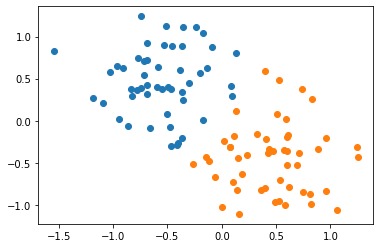

In [13]:
def plot_scatter():
  plt.scatter(X[y==0,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])
plot_scatter()

## Perceptron Model

In [4]:
class LM(nn.Module):
  def __init__(self,input_size,output_size):
    super().__init__()
    self.linear=nn.Linear(input_size,output_size)

  def forward(self,X):
    pred=torch.sigmoid(self.linear(X))
    return pred





In [5]:
torch.manual_seed(2)
linear_model=LM(2,1)
print(list(linear_model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [6]:
[w,b]=linear_model.parameters()
print(w)
print(b)
  

Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True)
Parameter containing:
tensor([0.1939], requires_grad=True)


In [7]:
def get_parameters():
  w1=w[0][0]
  w2=w[0][1]
  return w1.item(),w2.item(),b.item()

In [8]:
print(get_parameters())

(0.1622033268213272, -0.1682732254266739, 0.1939089596271515)


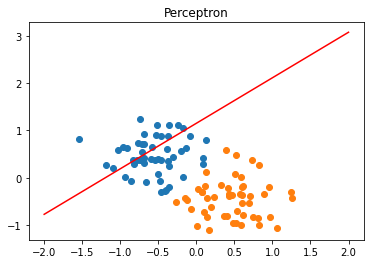

In [9]:
def plot_fit(title):
  plt.title(title)
  w1,w2,b=get_parameters()
  x1=np.array([-2.0,2.0])
  x2=(w1*x1+b)/-w2
  plt.plot(x1,x2,'r')
  plot_scatter()
plot_fit("Perceptron")


In [11]:
from torch.nn.modules.linear import Linear
X_data=torch.tensor(X)
y_data=torch.tensor(y)
optimizer=torch.optim.SGD(linear_model.parameters(),lr=0.01)#We will use Stochastic gradient descent to train our model
criterion=nn.BCELoss()#We use binary Cross Entropy Loss. 
lm=Linear(2,1)
epochs=100#Iteration number
losses=[]
for i in range(epochs):
  y_pred=linear_model.forward(X_data)
  loss=criterion(y_pred,y_data)
  losses.append(loss)
  loss.zero_grad()
  loss.backward()
  optimizer.step()


  print("Epoch:",i," Loss:",loss)

RuntimeError: ignored